In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-stock-price/GOOG.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_csv("/kaggle/input/google-stock-price/GOOG.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4853,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700
4854,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500
4855,2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400
4856,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4853,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700
4854,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500
4855,2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400
4856,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100
4857,2023-12-05,130.369995,133.539993,129.729996,132.389999,132.389999,19216500


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4.858000e+03
mean,41.477174,41.917059,41.055491,41.494404,41.494404,1.189152e+08
std,38.590695,39.031758,38.193016,38.618107,38.618107,1.512424e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.846597,12.954195,12.712414,12.834642,12.834642,2.854912e+07
50%,26.499958,26.728268,26.289323,26.537501,26.537501,6.168836e+07
75%,57.367250,58.028500,56.962251,57.611249,57.611249,1.467329e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB


In [8]:
df["Date"].tail()

4853    2023-11-29
4854    2023-11-30
4855    2023-12-01
4856    2023-12-04
4857    2023-12-05
Name: Date, dtype: object

In [9]:
df["Open"].head(10)

0    2.490664
1    2.515820
2    2.758411
3    2.770615
4    2.614201
5    2.613952
6    2.692408
7    2.622171
8    2.547950
9    2.557912
Name: Open, dtype: float64

In [10]:
df["Open"].tail(10)

4848    137.940002
4849    139.100006
4850    139.539993
4851    137.570007
4852    137.630005
4853    138.985001
4854    136.399994
4855    133.320007
4856    131.294006
4857    130.369995
Name: Open, dtype: float64

In [11]:
df["Low"].head(10)

0    2.390042
1    2.503118
2    2.716070
3    2.579581
4    2.587302
5    2.606729
6    2.632383
7    2.540727
8    2.544463
9    2.482445
Name: Low, dtype: float64

In [12]:
df["Low"].tail(10)

4848    137.705002
4849    139.000000
4850    137.470001
4851    137.539993
4852    137.039993
4853    136.294998
4854    132.789993
4855    132.151993
4856    129.399994
4857    129.729996
Name: Low, dtype: float64

In [13]:
df[["Date","Open","Low"]]

,Date,Open,Low
0,2004-08-19,2.490664,2.390042
1,2004-08-20,2.515820,2.503118
2,2004-08-23,2.758411,2.716070
3,2004-08-24,2.770615,2.579581
4,2004-08-25,2.614201,2.587302
...,...,...,...
4853,2023-11-29,138.985001,136.294998
4854,2023-11-30,136.399994,132.789993
4855,2023-12-01,133.320007,132.151993
4856,2023-12-04,131.294006,129.399994


In [14]:
df[["Open","High","Close","Volume"]]

,Open,High,Close,Volume
0,2.490664,2.591785,2.499133,897427216
1,2.515820,2.716817,2.697639,458857488
2,2.758411,2.826406,2.724787,366857939
3,2.770615,2.779581,2.611960,306396159
4,2.614201,2.689918,2.640104,184645512
...,...,...,...,...
4853,138.985001,139.669998,136.399994,21014700
4854,136.399994,136.960007,133.919998,29913500
4855,133.320007,133.500000,133.320007,24258400
4856,131.294006,131.449997,130.630005,24117100


<Axes: title={'center': 'Price of Google stock highest'}, xlabel='Date', ylabel='High'>

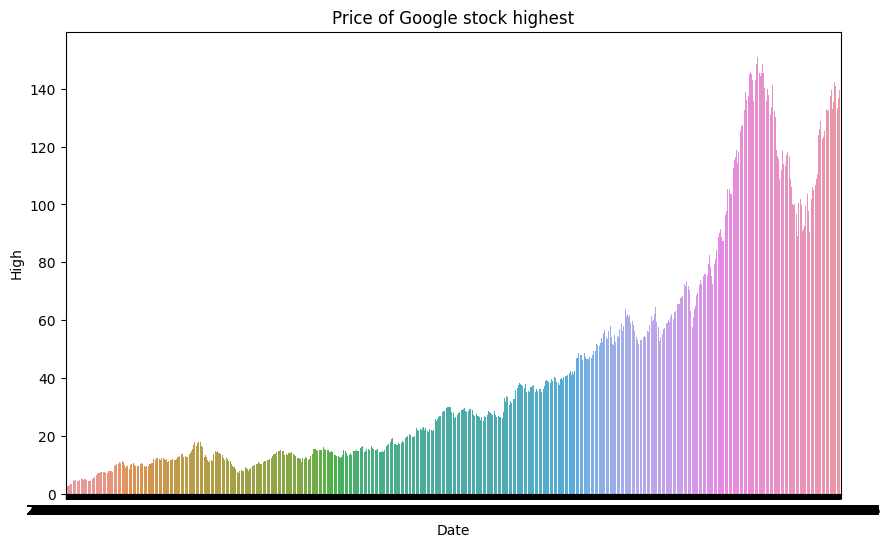

In [15]:
plt.figure(figsize=(10,6))
plt.title("Price of Google stock highest")
sns.barplot(data=df,x="Date",y="High")

<Axes: title={'center': 'Price of Google stock lowest on these dates'}, xlabel='Date', ylabel='Low'>

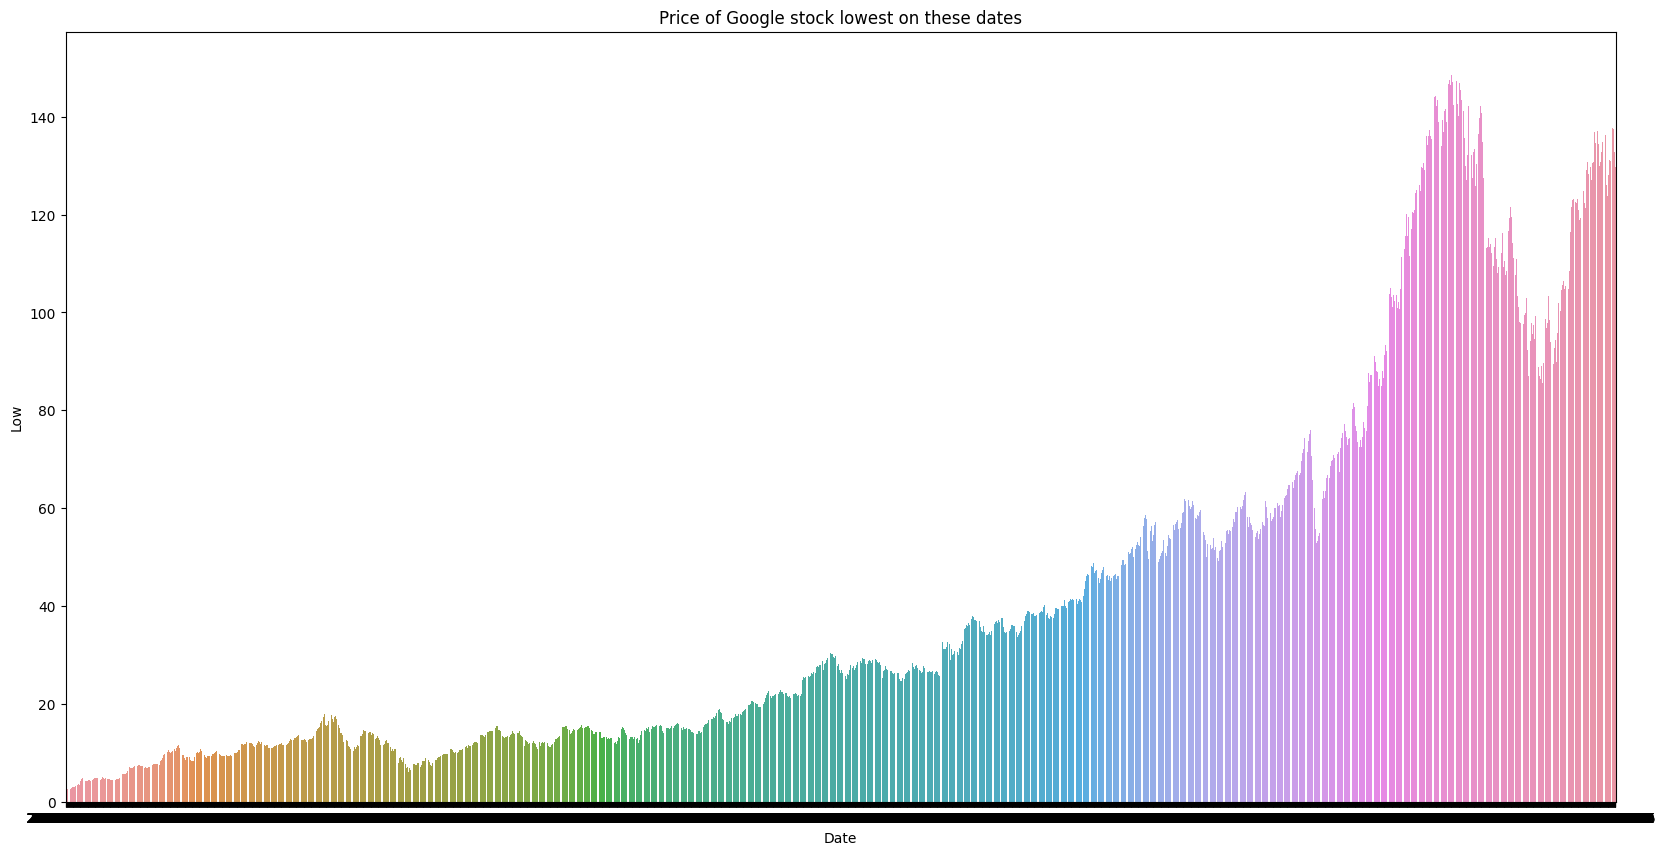

In [16]:
plt.figure(figsize=(20,10))
plt.title("Price of Google stock lowest on these dates")
sns.barplot(data=df,x="Date",y="Low")

<Axes: title={'center': 'volume of the stock'}, xlabel='Date', ylabel='Volume'>

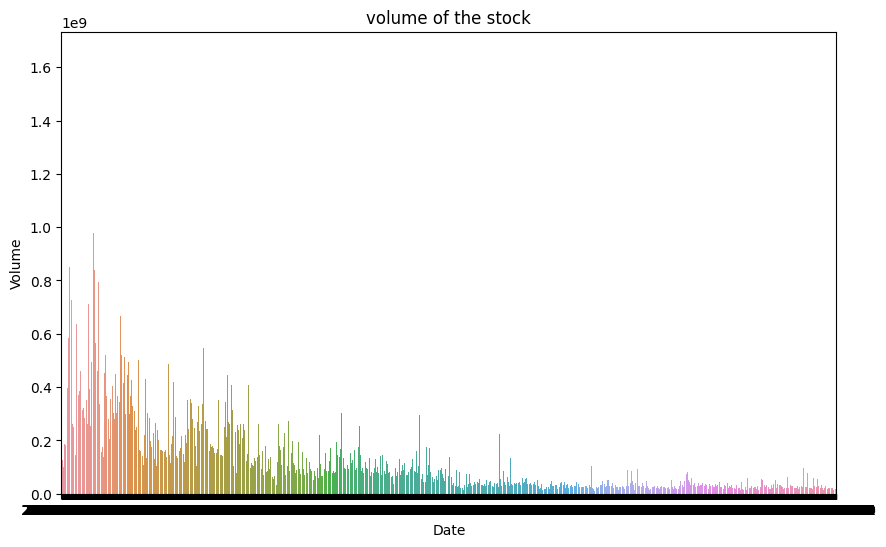

In [17]:
plt.figure(figsize=(10,6))
plt.title("volume of the stock")
sns.barplot(data=df,x="Date",y="Volume")

<Axes: title={'center': 'Opening price of Google'}, xlabel='Date', ylabel='Open'>

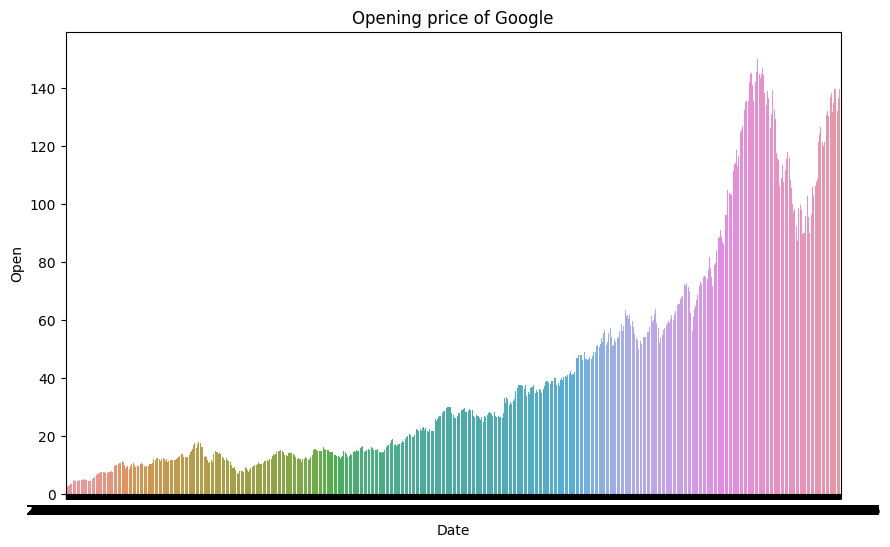

In [18]:
plt.figure(figsize=(10,6))
plt.title("Opening price of Google")
sns.barplot(data=df,x="Date",y="Open")

In [19]:
fig=px.histogram(df,x="Date",y="Open",
                title="Opening and closing",
                width=350,
                height=450)
fig.update_layout(font=dict(size=20))
fig.show()

<Axes: xlabel='High', ylabel='Low'>

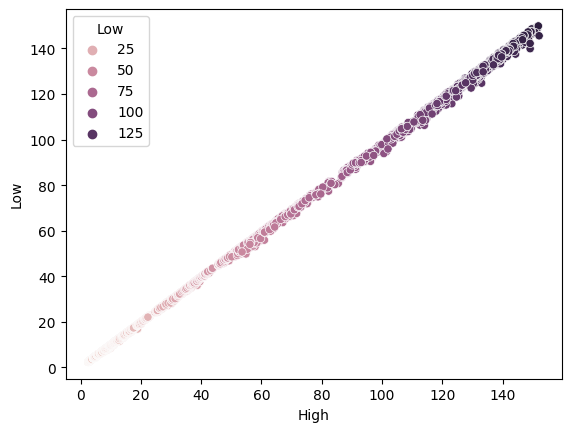

In [20]:
sns.scatterplot(x=df["High"],y=df["Low"],hue=df["Low"])